In [1]:
!pip install git+https://github.com/imanring/Cox_Hawkes_Cov.git

  Cloning https://github.com/imanring/Cox_Hawkes_Cov.git to /tmp/pip-req-build-pw1jcocz
  Running command git clone --filter=blob:none --quiet https://github.com/imanring/Cox_Hawkes_Cov.git /tmp/pip-req-build-pw1jcocz
  Resolved https://github.com/imanring/Cox_Hawkes_Cov.git to commit 8ed9eb01f8c818350247d0d809de920be67e1897
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for BSTPP, since package 'wheel' is not installed.
  Running setup.py install for BSTPP ... done


In [1]:
from bstpp.main import Point_Process_Model

/home/imanring/PointProcess/Cox_Hawkes/cox_hawkes/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpyro.distributions as dist

In [3]:
A = ((3,15.5),(4,16.5))
model_name = 'lgcp'
model = Point_Process_Model('data/spt_data.csv',A,model=model_name,
                            spatial_cov='data/spatial_cov.csv',a_0=dist.Normal(0,5))

In [5]:
import pickle
pre_run = False
if pre_run:
    with open(f'output/{model_name}/output.pkl', 'rb') as f:
        output = pickle.load(f)
    model.mcmc = output['mcmc']
    model.mcmc_samples = output['samples']
else:
    model.run_mcmc()

sample: 100%|███████████████████████████| 1500/1500 [00:23<00:00, 62.66it/s, 255 steps of size 1.65e-02. acc. prob=0.95]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0     -2.96      0.56     -2.96     -3.81     -1.90    343.44      1.00
          w[0]      0.75      0.07      0.75      0.64      0.86    896.06      1.00
          w[1]      0.15      0.03      0.15      0.10      0.20    617.05      1.00
          w[2]      0.28      0.02      0.28      0.24      0.32    910.81      1.00
          w[3]     -0.79      0.05     -0.79     -0.87     -0.71   1015.72      1.00
          w[4]      0.37      0.03      0.37      0.32      0.41    911.86      1.00
          w[5]      0.34      0.03      0.34      0.30      0.39   1160.97      1.00
          w[6]     -0.23      0.03     -0.23     -0.28     -0.19    831.37      1.00
          w[7]     -0.35      0.03     -0.35     -0.39     -0.30    803.06      1.00
          w[8]      0.93      0.05      0.92      0.84      1.01    752.13      1.00
          w[9]      0.01      0.03      0.01     -0.03      0.06

FileNotFoundError: [Errno 2] No such file or directory: 'output/lgcp/output.pkl'

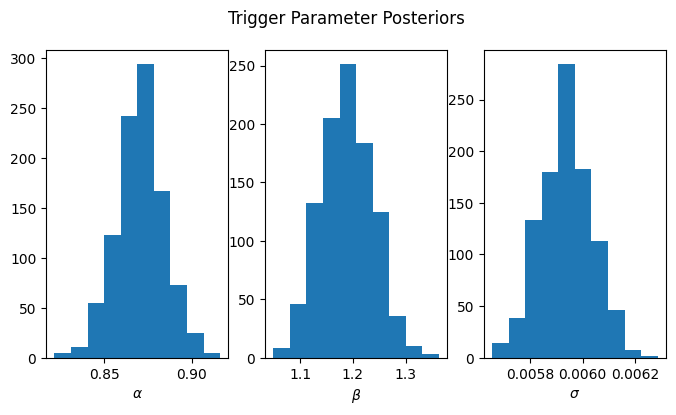

In [10]:
model.plot_trigger_posterior(f'output/{model_name}/trig_post.png')

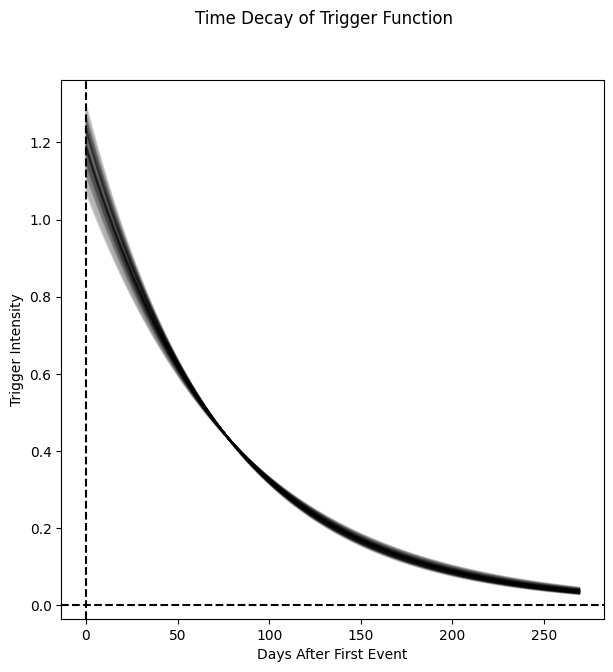

Mean trigger time: 76.9 days


In [11]:
model.plot_trigger_time_decay(f'output/{model_name}/trig_post_time_decay.png')

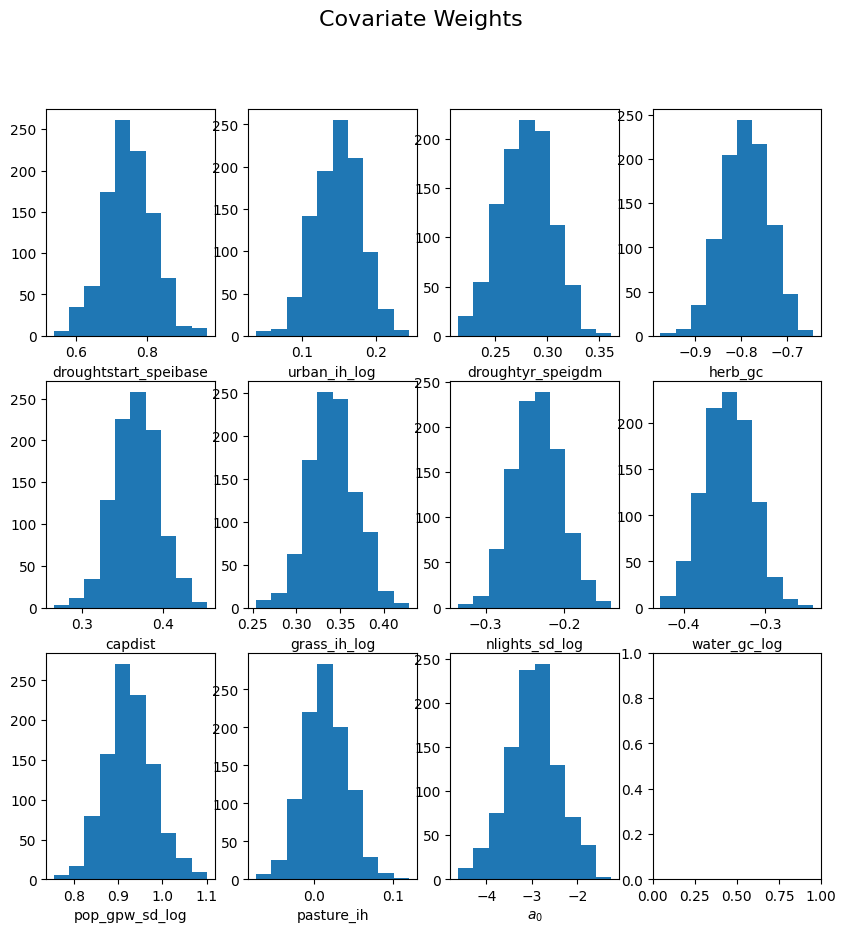

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
droughtstart_speibase,0.749402,0.067942,11.030015,0.000000e+00,0.607829,0.878932
urban_ih_log,0.148419,0.031606,4.695889,2.654489e-06,0.087002,0.206213
droughtyr_speigdm,0.279425,0.024375,11.463624,0.000000e+00,0.232885,0.325372
herb_gc,-0.791183,0.050599,-15.636367,0.000000e+00,-0.891778,-0.698064
capdist,0.366793,0.028136,13.036480,0.000000e+00,0.314501,0.421678
grass_ih_log,0.341229,0.026917,12.677278,0.000000e+00,0.288241,0.392682
nlights_sd_log,-0.234258,0.030523,-7.674841,1.654232e-14,-0.290108,-0.172869
water_gc_log,-0.345187,0.029486,-11.706995,0.000000e+00,-0.402343,-0.286800
pop_gpw_sd_log,0.925702,0.053761,17.218876,0.000000e+00,0.826646,1.037193
pasture_ih,0.014009,0.027275,0.513596,6.075346e-01,-0.038809,0.069734


In [12]:
model.cov_weight_post_summary(plot_file=f'output/{model_name}/cov_post_hist.png',
                              summary_file=f'output/{model_name}/cov_par_summary.csv')

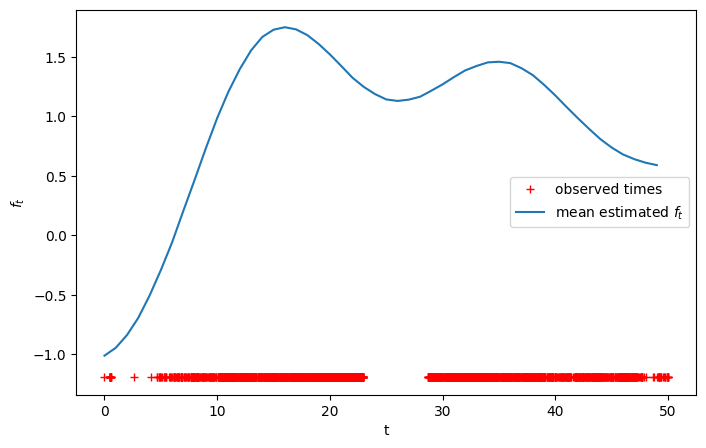

In [6]:
model.plot_temporal_background(f'output/{model_name}/temporal_gp_post_mean.png')

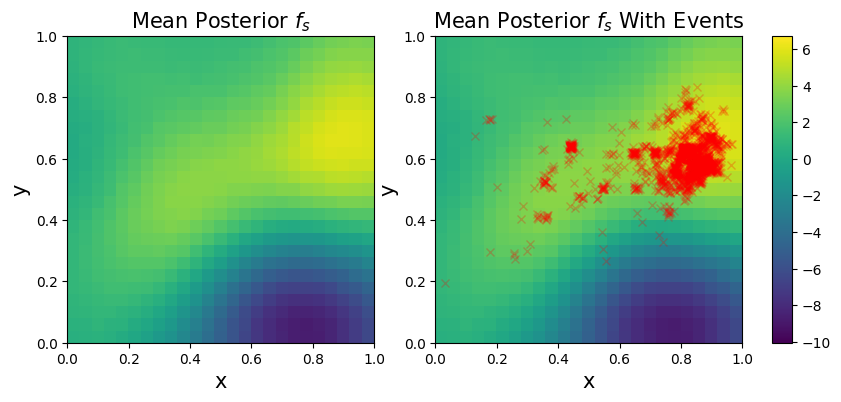

In [11]:
model.plot_spatial_background(f'output/{model_name}/spatial_gp_post_mean.png')

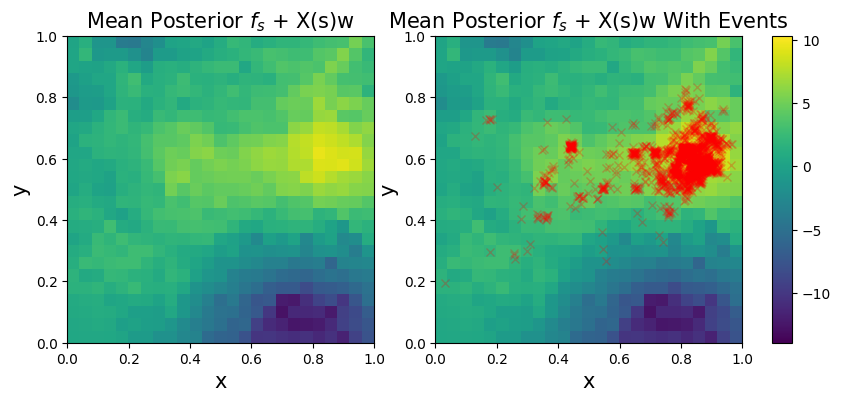

In [10]:
model.plot_spatial_background(f'output/{model_name}/spatial_gp_cov_post_mean.png',include_cov=True)